In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, roc_auc_score,precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [162]:
df=pd.read_csv("Train.csv")

In [163]:
df.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


In [164]:
df.isnull().sum()

Person_id             0
Survey_date           0
Round                 0
Status                0
Tenure             1394
Geography             0
Province              0
Matric             1008
Degree             1831
Diploma            1809
Schoolquintile     1661
Math               3023
Mathlit            2667
Additional_lang    2002
Home_lang          3639
Science            3288
Female                0
Sa_citizen            0
Birthyear             0
Birthmonth            0
Target                0
dtype: int64

In [166]:
df.isnull().sum()

Person_id             0
Survey_date           0
Round                 0
Status                0
Tenure             1394
Geography             0
Province              0
Matric             1008
Degree             1831
Diploma            1809
Schoolquintile     1661
Math               3023
Mathlit            2667
Additional_lang    2002
Home_lang          3639
Science            3288
Female                0
Sa_citizen            0
Birthyear             0
Birthmonth            0
Target                0
dtype: int64

In [195]:
df.dtypes

Survey_date        float64
Round              float64
Status               int32
Tenure             float64
Geography            int32
Province             int32
Matric             float64
Degree             float64
Diploma            float64
Schoolquintile     float64
Math                 int32
Mathlit              int32
Additional_lang      int32
Science            float64
Female             float64
Sa_citizen         float64
Birthyear          float64
Birthmonth         float64
Target             float64
dtype: object

In [168]:

# Ensure no trailing spaces in column names
df.columns = df.columns.str.strip()

# Initialize LabelEncoder
encoder = LabelEncoder()

# Categorical columns to encode
categorical_cols = ['Status', 'Geography', 'Province', 'Math', 'Mathlit', 'Additional_lang']

# Fill missing values with "Unknown" before encoding
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Check results
print(df.head())


       Person_id Survey_date  Round  Status  Tenure  Geography  Province  \
0  Id_eqz61wz7yn  2022-02-23      2       3     NaN          0         5   
1  Id_kj5k3g5wud  2023-02-06      4       4   427.0          1         6   
2  Id_9h0isj38y4  2022-08-08      3       1     NaN          2         1   
3  Id_5ch3zwpdef  2022-03-16      2       4   810.0          2         0   
4  Id_g4elxibjej  2023-03-22      4       3     NaN          2         4   

   Matric  Degree  Diploma  ...  Math  Mathlit  Additional_lang  Home_lang  \
0     1.0     0.0      0.0  ...     0        7                2        NaN   
1     1.0     0.0      0.0  ...     1        7                1        NaN   
2     1.0     0.0      0.0  ...     1        7                1        NaN   
3     NaN     NaN      NaN  ...     7        7                6        NaN   
4     NaN     NaN      NaN  ...     7        7                6        NaN   

     Science Female  Sa_citizen  Birthyear  Birthmonth  Target  
0   0 - 2

In [169]:
df.head()

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,3,NaN,0,5,1.0,0.0,0.0,...,0,7,2,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,4,427.0,1,6,1.0,0.0,0.0,...,1,7,1,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,1,NaN,2,1,1.0,0.0,0.0,...,1,7,1,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,4,810.0,2,0,NaN,NaN,NaN,...,7,7,6,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,3,NaN,2,4,NaN,NaN,NaN,...,7,7,6,NaN,NaN,1,1,1998,12,0


In [170]:
df["Home_lang"].value_counts()

Home_lang
50 - 59 %     140
40 - 49 %     137
60 - 69 %      74
70 - 79 %      18
30 - 39 %       7
80 - 100 %      5
Name: count, dtype: int64

In [171]:
df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).fillna(df.select_dtypes(include=['number']).median())


In [172]:
df=df.drop(["Home_lang"], axis=1)
df=df.drop(["Person_id"], axis=1)


In [173]:
import numpy as np
import pandas as pd

# Function to convert percentage ranges to integer (midpoint)
def convert_percentage_to_numeric(value):
    if isinstance(value, str) and " - " in value:
        lower, upper = map(int, value.replace("%", "").split(" - "))
        return int((lower + upper) / 2)  # Take the midpoint as an integer
    return np.nan  # Keep NaN values as they are

# Convert 'Science' column to numeric
df['Science'] = df['Science'].apply(convert_percentage_to_numeric)

# Fill NaN values with the median of known values (as int64)
df['Science'] = df['Science'].fillna(int(df['Science'].median())).astype('int64')

print(df['Science'].head())  # Check final result


0    14
1    34
2    34
3    34
4    34
Name: Science, dtype: int64


In [174]:
# Convert 'Survey_date' to datetime
df['Survey_date'] = pd.to_datetime(df['Survey_date'])

# Convert to integer (Unix timestamp in milliseconds)
df['Survey_date'] = df['Survey_date'].astype('int64') // 10**6  # Divide by 1,000,000 to get milliseconds


In [175]:

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select only the numerical columns for normalization
num_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Normalize the numerical data
df[num_columns] = scaler.fit_transform(df[num_columns])

# Check the result
print(df.head())


   Survey_date     Round  Status    Tenure  Geography  Province  Matric  \
0     0.330523  0.333333       3  0.110955          0         5     1.0   
1     0.917369  1.000000       4  0.119944          1         6     1.0   
2     0.610455  0.666667       1  0.110955          2         1     1.0   
3     0.365936  0.333333       4  0.227528          2         0     1.0   
4     0.991568  1.000000       3  0.110955          2         4     1.0   

   Degree  Diploma  Schoolquintile  Math  Mathlit  Additional_lang   Science  \
0     0.0      0.0             0.6     0        7                2  0.000000   
1     0.0      0.0             0.2     1        7                1  0.263158   
2     0.0      0.0             0.6     1        7                1  0.263158   
3     0.0      0.0             0.6     7        7                6  0.263158   
4     0.0      0.0             0.6     7        7                6  0.263158   

   Female  Sa_citizen  Birthyear  Birthmonth  Target  
0     1.0    

In [176]:
# Drop unnecessary columns
X = df.drop(['Target'], axis=1)
Y = df['Target']


In [177]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [178]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [179]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # Train your model on the resampled dataset
# model = RandomForestClassifier(random_state=42)
# model.fit(X_resampled, y_resampled)


In [192]:
# Train a RandomForestClassifier
model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=100,      # Reduce trees (default is 100)
    max_depth=10,          # Limit tree depth to prevent overfitting
    min_samples_split=10,  # Require at least 10 samples to split a node
    min_samples_leaf=5,    # Each leaf must have at least 5 samples
    random_state=42
)

# Fit and evaluate model
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
x_pred = model.predict(X_resampled)

# Evaluate Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

grid_search.fit

# Train the model with the best parameters
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)
# Print Accuracy
print("\nModel test Accuracy:", accuracy_score(y_test, y_pred))
print("\nModel train Accuracy:", accuracy_score(y_resampled, x_pred))



Model test Accuracy: 0.7997512437810945

Model train Accuracy: 0.8835470085470085


In [182]:
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(importances)


Status             0.323728
Survey_date        0.169377
Tenure             0.105917
Round              0.089527
Birthyear          0.071539
Birthmonth         0.044806
Province           0.043839
Female             0.025655
Schoolquintile     0.025352
Mathlit            0.022861
Additional_lang    0.021414
Math               0.017477
Geography          0.016283
Science            0.008549
Matric             0.005866
Diploma            0.004347
Degree             0.003463
Sa_citizen         0.000000
dtype: float64


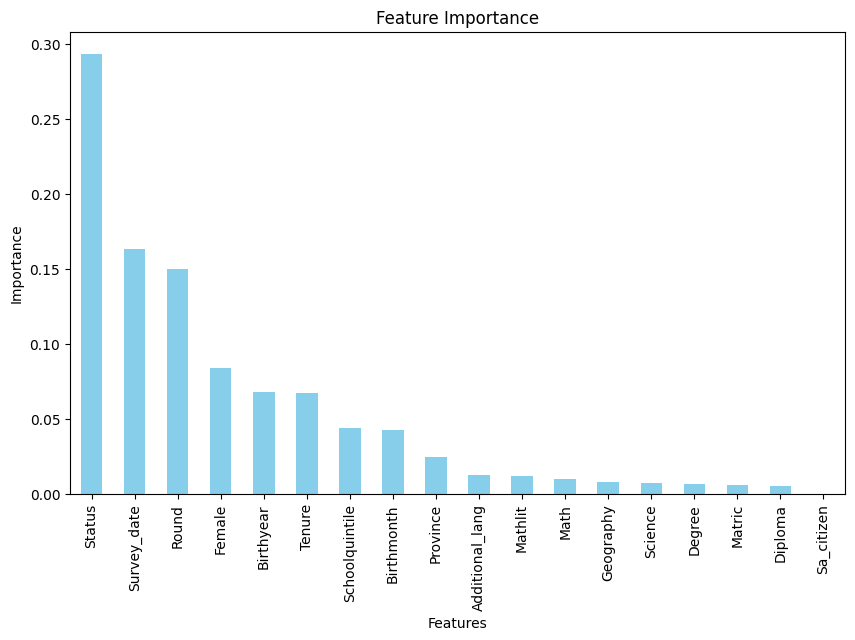

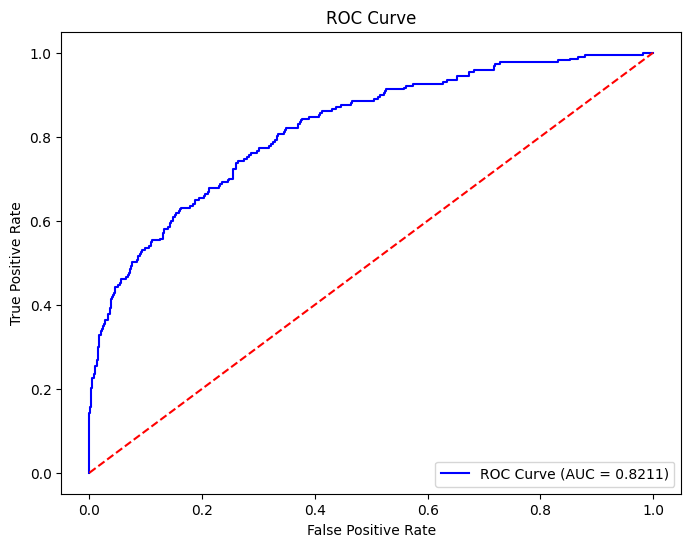

In [193]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

# Feature Importance Plot
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [194]:
# Save cleaned data
df.to_csv("cleaned_hospital_data.csv", index=False)